In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('1', '1', '0', '1', '0', '1', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ A □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    epsilon_0=0.01,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=20
                    )


In [4]:

df = avg_experiment(maze=maze,
                         cfg=cfg,
                         number_of_tests=2,
                         explore_trials=2500,
                         exploit_trials=2500,
                         )


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.0675823000000002, 'numerosity': 142, 'population': 120, 'average_specificity': 11.330985915492958, 'fraction_accuracy': 1.0, 'knowledge': 0.0}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 10, 'reward': 1032.552731331664, 'perf_time': 0.2017388000000011, 'numerosity': 1800, 'population': 1403, 'average_specificity': 20.795, 'fraction_accuracy': 0.84, 'knowledge': 53.42465753424658}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 24, 'reward': 1000.2715051852821, 'perf_time': 0.4192424000000301, 'numerosity': 1800, 'population': 1491, 'average_specificity': 28.43888888888889, 'fraction_accuracy': 0.81, 'knowledge': 54.794520547945204}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 31, 'reward': 1000.0247764723307, 'perf_time': 0.5578600000000051, 'numerosity': 1800, 'population': 1452, 'average_specificity': 30.996666666666666, 'fraction_accuracy': 0.91, 'knowledge': 59.589041095890416}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 9, 'reward': 1045.9873809239048, 'perf_time': 0.1266768000000411, 'numerosity': 1800, 'population': 1470, 'average_specificity': 32.58833333333333, 'fraction_accura

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 100, 'reward': 1.3361201362613567e-12, 'perf_time': 1.3978601999997409, 'numerosity': 1800, 'population': 1412, 'average_specificity': 17.82111111111111, 'fraction_accuracy': 0.93, 'knowledge': 47.26027397260274}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 32, 'reward': 1000.0173900440867, 'perf_time': 0.6245647000000645, 'numerosity': 1800, 'population': 1493, 'average_specificity': 27.555, 'fraction_accuracy': 0.79, 'knowledge': 54.794520547945204}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 17, 'reward': 1003.0337946818588, 'perf_time': 0.29456029999983, 'numerosity': 1800, 'population': 1487, 'average_specificity': 29.287222222222223, 'fraction_accuracy': 0.85, 'knowledge': 56.849315068493155}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 1, 'reward': 1000.0, 'perf_time': 0.021754100000180188, 'numerosity': 1800, 'population': 1456, 'average_specificity': 27.872222222222224, 'fraction_accuracy': 

In [5]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy,knowledge
trial,,,,,,,,
0,100.0,0.000000,0.069996,145.0,121.0,10.385088,1.000,0.684932
100,70.0,500.000561,0.984925,1800.0,1333.5,16.170278,0.905,40.068493
200,55.0,516.276366,0.799799,1800.0,1407.5,19.308056,0.885,50.342466
300,34.5,1000.786646,0.595199,1800.0,1461.0,25.392778,0.860,55.136986
400,2.5,1483.634372,0.029921,1800.0,1466.5,29.612500,0.920,60.616438
500,28.0,1000.144448,0.521904,1800.0,1492.0,27.996944,0.800,54.794521
600,23.5,1355.746595,0.413378,1800.0,1460.0,30.663056,0.925,56.849315
700,24.0,1001.529286,0.426210,1800.0,1469.5,30.141944,0.880,58.219178
800,62.5,500.095594,1.135274,1800.0,1472.5,29.418056,0.890,54.794521


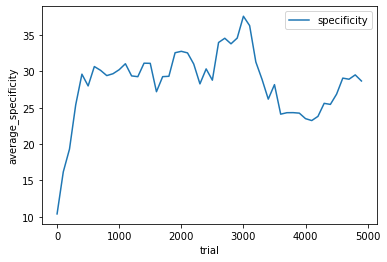

In [6]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])

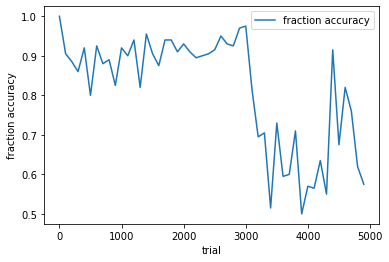

In [7]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

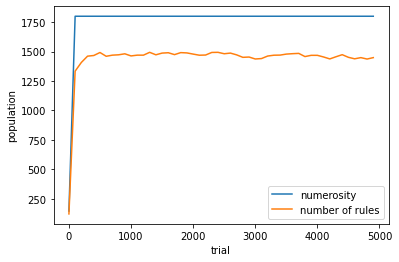

In [8]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [ ]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["Knowledge %"])

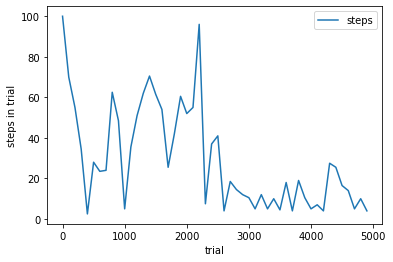

In [9]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])